<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
</font>
<br>
<img src="https://static.tildacdn.one/tild3639-3035-4131-a461-363737393037/noroot.png" alt="University Logo" width="400" height="224">
<br>
<font face="Times New Roman" size=5 align=center>
Sharif University of Technology
<br>
Electrical Engineering Department
</font>
<br>
<font size=6>
Assignment 12: Autoencoders and Generative AI
</font>
<br>
<font size=4>
Zahra Helalizadeh 400102193
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
</font>
</div></font>

# 1. Setup and Imports

In this section, we import the necessary libraries for building and training our autoencoders and generative models. We also load the Fashion MNIST dataset, normalize the pixel values, and prepare the data for training.

**Library Explanation**:

- `numpy`: For numerical operations and array manipulation.
- `matplotlib.pyplot`: For visualizing sample images and results.
- `tensorflow` and `keras`: For building and training deep learning models. We use Keras (which is part of TensorFlow) for model layers and utilities.
- We also set a random seed for reproducibility so that results remain consistent across runs.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

Now we will load the Fashion MNIST dataset using Keras's built-in function. The dataset contains 60,000 training images and 10,000 test images of 28x28 grayscale images across 10 fashion categories.

We normalize the pixel values to the range [0, 1] by dividing by 255.0. This is a common preprocessing step to help neural networks train more efficiently.

In [2]:
# Load Fashion MNIST dataset
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension (needed for convolutional models)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("Training data shape:", x_train.shape)
print("Test data shape:", x_test.shape)

Training data shape: (60000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


At this point, we have imported all necessary libraries and prepared the Fashion MNIST dataset. The training and test data are now normalized and reshaped to have a channel dimension, which is required for convolutional layers in later sections.

# 2. Exploratory Data Analysis (EDA)

In this section, we visualize some sample images from the Fashion MNIST dataset to understand its structure and content. Each image is a 28x28 grayscale image representing a fashion item. Although we will not use labels in this assignment, we will load them here for clarity during visualization.

By visualizing the dataset, we gain a better intuition about what kind of data our models will learn from.

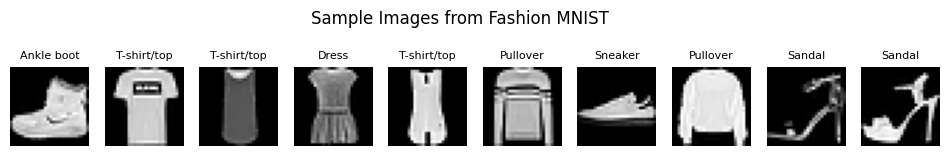

In [3]:
# Load the dataset again with labels for visualization purposes
(x_train_vis, y_train_vis), (_, _) = keras.datasets.fashion_mnist.load_data()

# Define the class names corresponding to labels
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot 10 sample images with their class labels
plt.figure(figsize=(12, 2))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_train_vis[i], cmap="gray")
    plt.title(class_names[y_train_vis[i]], fontsize=8)
    plt.axis("off")
plt.suptitle("Sample Images from Fashion MNIST", fontsize=12)
plt.show()

Each image in the dataset is a 28x28 pixel grayscale image. The classes represent common fashion items such as shirts, trousers, and shoes.

From this visualization, we can see that:

- The dataset consists of relatively simple, centered objects on a uniform background.
- There is variability in the shapes and styles of items within each class.
- The images are low-resolution, making them suitable for small neural networks.

This understanding will help guide our decisions when designing the architecture of autoencoders and generative models.

# 3. Dense Autoencoder

## 3.1 Architecture

In this section, we define a simple dense (fully connected) autoencoder. Autoencoders are neural networks that learn to compress input data into a lower-dimensional representation (encoding) and then reconstruct it back to the original shape (decoding).

We use dense layers for both the encoder and decoder parts. Since the input images are 28x28, we flatten them into 784-dimensional vectors for the dense layers. The encoder compresses this to a lower-dimensional latent space, and the decoder reconstructs it back.

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape

# Define input shape
input_shape = (28, 28, 1)

# Encoder
input_img = Input(shape=input_shape)
x = Flatten()(input_img)
encoded = Dense(64, activation='relu')(x)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)
output_img = Reshape((28, 28, 1))(decoded)

# Define the model
dense_autoencoder = Model(inputs=input_img, outputs=output_img)

# Compile the model
dense_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Print the model summary
dense_autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 784)            │        50,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 28, 28, 1)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

In this architecture:

- The encoder flattens the 28x28 image into a 784-dimensional vector, then reduces it to 64 dimensions using a dense layer with ReLU activation.
- The decoder maps the 64-dimensional vector back to a 784-dimensional output using a dense layer with sigmoid activation, and reshapes it back to 28x28x1.

This structure allows the model to learn a compressed representation of the input image while still being able to reconstruct it.

## 3.2 Training

Now that we have defined the architecture of the dense autoencoder, we will train it using the Fashion MNIST dataset. The input and output of the model are both the same images, since the goal of the autoencoder is to reconstruct its input.

We will use the training set for learning and evaluate the model on the test set to check its reconstruction quality. The loss function used is binary crossentropy, which works well when the pixel values are normalized between 0 and 1.

In [5]:
# Train the dense autoencoder
history = dense_autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.4742 - val_loss: 0.3280
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3192 - val_loss: 0.3068
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3011 - val_loss: 0.2945
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2903 - val_loss: 0.2879
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2846 - val_loss: 0.2843
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2813 - val_loss: 0.2822
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2792 - val_loss: 0.2806
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2776 - val_loss: 0.2792
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2763 - val_loss: 0.2783
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2753 - val_loss: 0.2774
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.2746 - val_loss: 0.2768
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

The model is trained for 20 epochs with a batch size of 256. We shuffle the training data at each epoch to improve learning, and validate the model on the test set after each epoch.

Training an autoencoder helps it learn how to compress and reconstruct input data. After training, we expect the model to generate outputs that look very similar to the original inputs.

## 3.3 Evaluation

After training the dense autoencoder, we now evaluate its performance by comparing the original test images with their reconstructed versions. This visual comparison helps us understand how well the model has learned to compress and reconstruct the data.

We will plot a few examples from the test set alongside their corresponding reconstructions.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


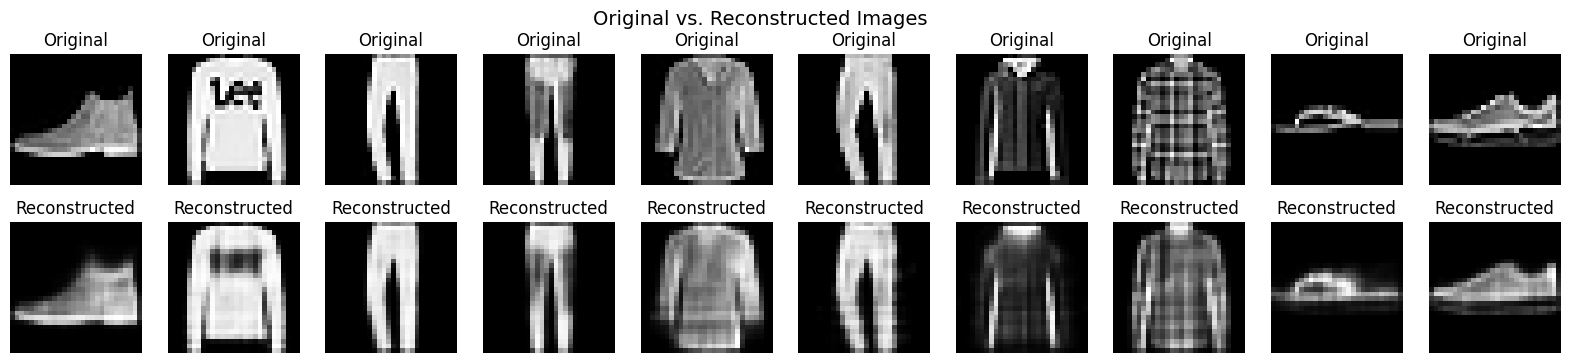

In [6]:
# Generate reconstructed images
decoded_imgs = dense_autoencoder.predict(x_test)

# Display original and reconstructed images side by side
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.suptitle("Original vs. Reconstructed Images", fontsize=14)
plt.show()

The reconstructed images resemble the original inputs, although some fine details may be slightly blurred or lost. This is expected due to the compression in the latent space.

Dense autoencoders are useful for:

- Learning compact, low-dimensional representations of high-dimensional data.
- Performing dimensionality reduction and feature extraction.
- Removing noise or artifacts from data when trained properly.

From the reconstruction results, we observe that the model captures the overall shape and structure of the fashion items, which suggests that the dense autoencoder has learned meaningful internal representations of the input data.

# 4. Convolutional Autoencoder

## 4.1 Architecture

In this section, we define a convolutional autoencoder that uses convolutional layers instead of dense layers. Convolutional layers are better suited for image data because they can capture spatial hierarchies and local patterns such as edges and textures.

The encoder will use convolutional layers to reduce the spatial dimensions and increase feature depth, creating a compressed latent representation. The decoder will use convolutional transpose layers (also called deconvolutional layers) to reconstruct the original image from the latent space.

This architecture generally results in better reconstruction quality compared to dense autoencoders for image data.

In [7]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, UpSampling2D

input_img = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

conv_autoencoder.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

In this convolutional autoencoder:

- The encoder uses two convolutional layers followed by max pooling to progressively reduce the spatial dimensions while increasing feature depth.
- The decoder mirrors the encoder, using convolutional layers followed by upsampling to reconstruct the original image size.
- The final layer uses a sigmoid activation function to output pixel values between 0 and 1.

This architecture is expected to capture spatial features better and produce higher-quality reconstructions compared to the dense autoencoder.

## 4.2 Training

Now that the convolutional autoencoder architecture is defined, we will train it on the Fashion MNIST dataset.

The model takes the input images and tries to reconstruct them as output, learning to encode and decode the images through convolutional layers. We will train the model for 20 epochs and monitor the validation loss to assess reconstruction quality.

In [8]:
history_conv = conv_autoencoder.fit(
    x_train, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.3794 - val_loss: 0.2829
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.2780 - val_loss: 0.2750
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2714 - val_loss: 0.2737
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2677 - val_loss: 0.2673
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2643 - val_loss: 0.2641
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2613 - val_loss: 0.2629
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2598 - val_loss: 0.2616
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.2585 - val_loss: 0.2599
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2573 - val_loss: 0.2589
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2563 - val_loss: 0.2580
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.2556 - val_loss: 0.2574
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━

The model is trained with a batch size of 256 for 20 epochs, using shuffled training data to improve learning stability.

During training, the convolutional autoencoder learns more spatially-aware features due to convolutional layers, which often results in improved reconstruction compared to dense autoencoders.

## 4.3 Evaluation

After training the convolutional autoencoder, we evaluate its performance by visually comparing original images with their reconstructions.

This comparison allows us to observe how well the convolutional model preserves spatial details and overall image quality.

We will also reflect on how this model performs relative to the dense autoencoder and why convolutional architectures are typically more effective for image data.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


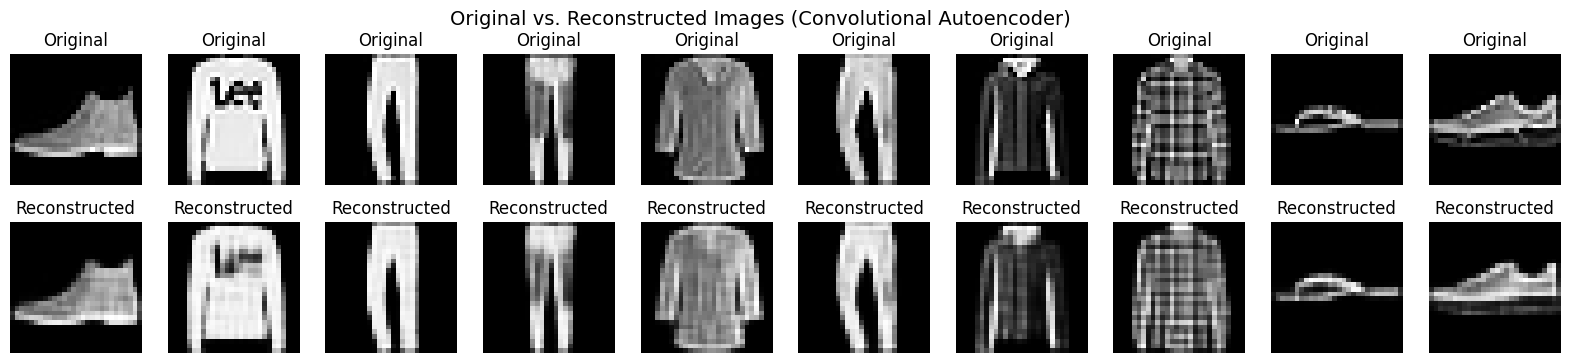

In [9]:
# Generate reconstructed images using convolutional autoencoder
decoded_conv_imgs = conv_autoencoder.predict(x_test)

# Plot original and reconstructed images side by side
n = 10  # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title("Original")
    plt.axis('off')

    # Reconstructed image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_conv_imgs[i].reshape(28, 28), cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')
plt.suptitle("Original vs. Reconstructed Images (Convolutional Autoencoder)", fontsize=14)
plt.show()

The convolutional autoencoder typically produces sharper and more detailed reconstructions compared to the dense autoencoder.

This improved performance occurs because convolutional layers exploit the spatial structure of images by learning local patterns such as edges and textures. Unlike dense layers, which treat all pixels independently, convolutional layers preserve spatial relationships, enabling better feature extraction and reconstruction.

Hence, convolutional autoencoders are generally more effective for image processing tasks.

# 5. Denoising Autoencoder

## 5.1 Adding Noise to Images

To train a denoising autoencoder, we first corrupt the input images by adding noise. The model learns to reconstruct the original clean images from these noisy inputs.

Here, we will add Gaussian noise to the Fashion MNIST training and test datasets. This simulates noisy or corrupted images that the autoencoder must learn to clean.

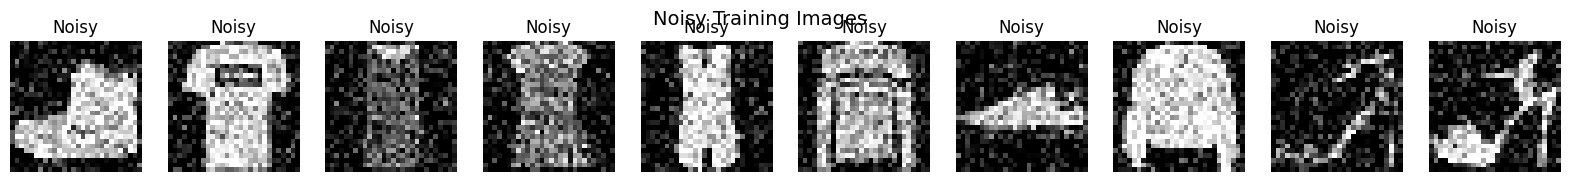

In [10]:
import numpy as np

# Define a function to add Gaussian noise to images
def add_gaussian_noise(images, mean=0.0, std=0.2):
    noisy_images = images + np.random.normal(mean, std, images.shape)
    noisy_images = np.clip(noisy_images, 0., 1.)  # Keep pixel values between 0 and 1
    return noisy_images

# Add noise to the training and test images
x_train_noisy = add_gaussian_noise(x_train)
x_test_noisy = add_gaussian_noise(x_test)

# Visualize some noisy images to understand the corruption
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_train_noisy[i].reshape(28, 28), cmap='gray')
    plt.title("Noisy")
    plt.axis('off')
plt.suptitle("Noisy Training Images", fontsize=14)
plt.show()

Gaussian noise is added by sampling values from a normal distribution and adding them to the original images. The pixel values are clipped to remain between 0 and 1, ensuring valid image data.

This noisy dataset will be used as input for the denoising autoencoder, while the original clean images will be the target outputs during training. This allows the model to learn how to remove noise and recover the original image.

## 5.2 Architecture and Training

We will use a convolutional autoencoder architecture similar to the previous section, but this time the input will be the noisy images, and the target will be the original clean images.

The goal is for the model to learn to remove noise and reconstruct clean images from corrupted inputs.

After defining the architecture, we will train the model using the noisy training images as input and the original training images as targets.

In [11]:
input_noisy = Input(shape=input_shape)

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_noisy)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

denoising_autoencoder = Model(input_noisy, decoded)
denoising_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

denoising_autoencoder.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 7, 7, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_2 (UpSampling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 14, 14, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 1)      │           289 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 74,497 (291.00 KB)

 Trainable params: 74,497 (291.00 KB)

 Non-trainable params: 0 (0.00 B)

The architecture consists of convolutional layers with ReLU activation for encoding and decoding, max pooling for downsampling, and upsampling layers for reconstruction.

Using the sigmoid activation in the last layer ensures the output pixel values are between 0 and 1.

This model will be trained to map noisy images to their clean counterparts.

In [12]:
history_denoise = denoising_autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.3862 - val_loss: 0.2882
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - loss: 0.2833 - val_loss: 0.2821
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2778 - val_loss: 0.2777
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2744 - val_loss: 0.2751
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2721 - val_loss: 0.2730
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2701 - val_loss: 0.2712
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.2684 - val_loss: 0.2698
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2671 - val_loss: 0.2687
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2661 - val_loss: 0.2680
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2654 - val_loss: 0.2673
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.2647 - val_loss: 0.2669
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

The denoising autoencoder is trained for 20 epochs with a batch size of 256, using noisy images as input and clean images as targets.

Training in this way allows the model to learn features that help it remove noise and recover the original image details.

## 5.3 Evaluation

To evaluate the denoising autoencoder, we compare three types of images side by side:

- The noisy input images that were fed into the model
- The original clean images (ground truth)
- The images reconstructed by the autoencoder after denoising

This visual comparison helps us understand how effectively the model removes noise while preserving the original image details.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


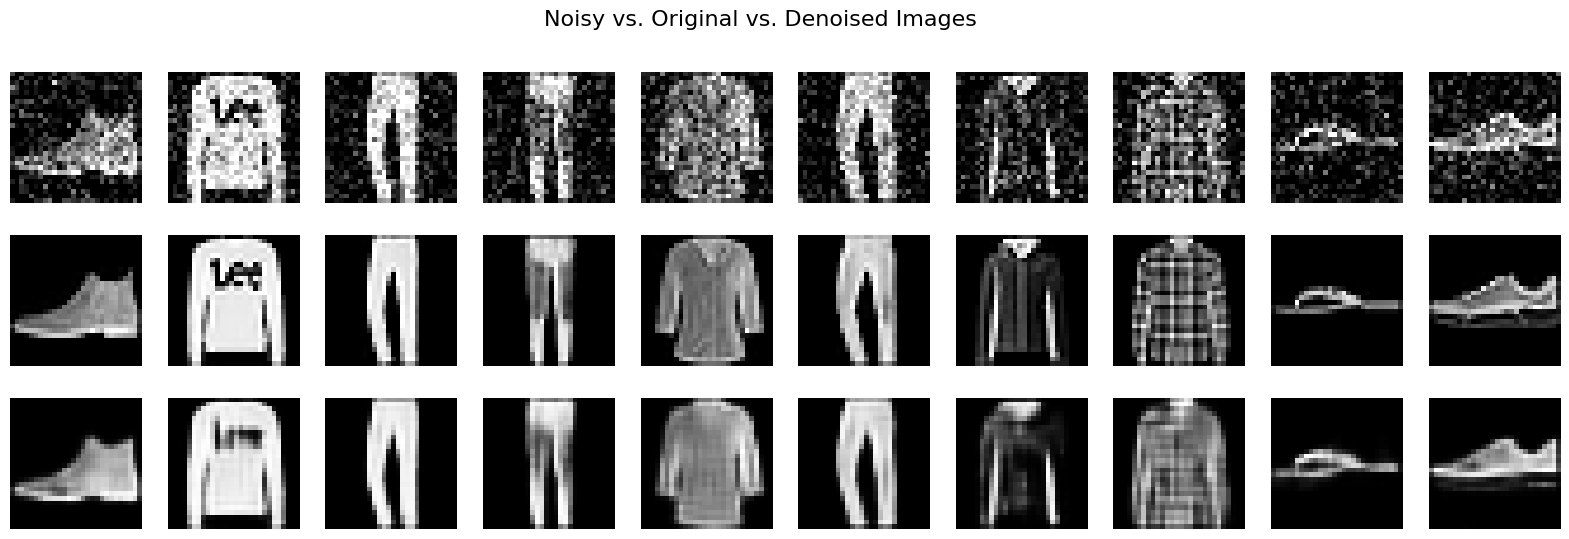

In [13]:
# Use the trained model to reconstruct images from noisy inputs
decoded_denoise_imgs = denoising_autoencoder.predict(x_test_noisy)

n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Display noisy input image
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel("Noisy", fontsize=12)
    plt.axis('off')

    # Display original clean image
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel("Original", fontsize=12)
    plt.axis('off')

    # Display denoised reconstructed image
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_denoise_imgs[i].reshape(28, 28), cmap='gray')
    if i == 0:
        plt.ylabel("Reconstructed", fontsize=12)
    plt.axis('off')

plt.suptitle("Noisy vs. Original vs. Denoised Images", fontsize=16)
plt.show()

The denoising autoencoder is generally able to remove much of the noise from the input images, producing outputs that closely resemble the original clean images.

Some fine details and textures may still be lost or blurred, but overall the model effectively learns to filter out noise while preserving the main structure of the images.

This demonstrates the utility of convolutional denoising autoencoders for improving image quality in noisy conditions.

# 6. Generative Adversarial Network (GAN) with CIFAR-10

## 6.1 Load CIFAR-10 Dataset

We will use the CIFAR-10 dataset to train our GAN. CIFAR-10 contains 60,000 32x32 color images in 10 different classes.

First, we load the dataset and normalize the images to the range [-1, 1], which is a common preprocessing step for GAN training because the generator’s output uses a tanh activation.

In [14]:
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()

# Normalize images to [-1, 1]
x_train_cifar = (x_train_cifar.astype('float32') - 127.5) / 127.5
x_test_cifar = (x_test_cifar.astype('float32') - 127.5) / 127.5

print(f"Training set shape: {x_train_cifar.shape}")
print(f"Test set shape: {x_test_cifar.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


Normalizing the pixel values to [-1, 1] helps stabilize GAN training by matching the range of the generator's output (using tanh activation) and the real images.

We now have the training and test sets ready for GAN training.

## 6.2 Define Generator and Discriminator

A GAN consists of two neural networks competing against each other:

- The **Generator** tries to produce realistic images from random noise.
- The **Discriminator** tries to distinguish between real images and fake images generated by the generator.

We will define both models using convolutional layers suitable for the CIFAR-10 image size (32x32x3).

In [15]:
from tensorflow.keras.layers import Dense, Reshape, Conv2DTranspose, Conv2D, Flatten, LeakyReLU, Dropout
from tensorflow.keras.models import Sequential

# Generator model
def build_generator():
    model = Sequential()
    model.add(Dense(8*8*256, use_bias=False, input_shape=(100,)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8, 8, 256)))

    model.add(Conv2DTranspose(128, (5,5), strides=(1,1), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False))
    model.add(LeakyReLU(alpha=0.2))

    model.add(Conv2DTranspose(3, (5,5), strides=(2,2), padding='same', use_bias=False, activation='tanh'))

    return model

generator = build_generator()
generator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 16384)          │     1,638,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu (LeakyReLU)         │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose                │ (None, 8, 8, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_1 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_1              │ (None, 16, 16, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_2              │ (None, 32, 32, 3)      │         4,800 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,667,200 (10.17 MB)

 Trainable params: 2,667,200 (10.17 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Discriminator model
def build_discriminator():
    model = Sequential()
    model.add(Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=(32, 32, 3)))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Conv2D(128, (5,5), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dropout(0.3))

    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))

    return model

discriminator = build_discriminator()
discriminator.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │         4,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_4 (LeakyReLU)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         8,193 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217,985 (851.50 KB)

 Trainable params: 217,985 (851.50 KB)

 Non-trainable params: 0 (0.00 B)

The generator takes a 100-dimensional noise vector and upsamples it through transposed convolutions to produce a 32x32x3 RGB image with pixel values in [-1, 1].

The discriminator is a binary classifier that downsamples images using convolutional layers and outputs a probability indicating whether the image is real or fake.

Next, we will set up the GAN training loop to optimize these two models adversarially.

## 6.3 Define GAN Model

To train the GAN, we combine the generator and discriminator into a single model.

- The discriminator is trained to distinguish real images from fake images.
- When training the combined GAN model, we freeze the discriminator weights and update only the generator weights.
- The generator tries to fool the discriminator by producing realistic images from random noise.

We will define the GAN model by stacking the generator and discriminator, and compile it with an appropriate loss function and optimizer.

In [17]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

# Compile discriminator
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(learning_rate=0.0002, beta_1=0.5),
                      metrics=['accuracy'])

# Build GAN by stacking generator and discriminator
discriminator.trainable = False  # Freeze discriminator weights in GAN training

gan_input = Input(shape=(100,))
generated_image = generator(gan_input)
gan_output = discriminator(generated_image)

gan = Model(gan_input, gan_output)

gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))

gan.summary()

Model: "functional_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 32, 32, 3)      │     2,667,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 1)              │       217,985 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,885,185 (11.01 MB)

 Trainable params: 2,667,200 (10.17 MB)

 Non-trainable params: 217,985 (851.50 KB)

The discriminator is compiled separately and trained on real and fake images.

For the GAN model, the discriminator's weights are frozen so that during GAN training only the generator learns to improve its outputs.

We use the Adam optimizer with a learning rate of 0.0002 and beta_1=0.5 as commonly recommended for stable GAN training.

Next, we will implement the training loop to alternately train the discriminator and generator.

## 6.4 Training Loop

The GAN training involves two alternating steps:

1. Train the discriminator on a batch of real images and a batch of fake images generated by the generator.
2. Train the generator via the combined GAN model to fool the discriminator into believing the generated images are real.

We will implement a training loop that runs for a specified number of epochs, logs progress, and saves generated images at intervals to monitor the generator's progress.

Epoch 1/50
Generator loss: 1.9526 | Discriminator loss: 0.8999


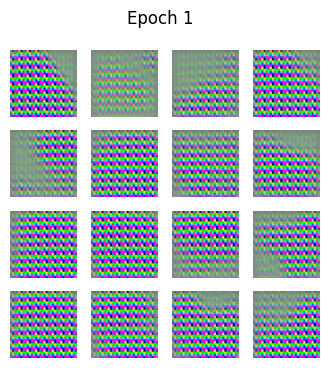

Epoch 2/50
Generator loss: 3.7022 | Discriminator loss: 0.5702
Epoch 3/50
Generator loss: 2.6320 | Discriminator loss: 0.5982
Epoch 4/50
Generator loss: 3.1025 | Discriminator loss: 0.5644
Epoch 5/50
Generator loss: 2.8483 | Discriminator loss: 0.6522
Epoch 6/50
Generator loss: 2.5605 | Discriminator loss: 0.7203
Epoch 7/50
Generator loss: 1.9086 | Discriminator loss: 0.8896
Epoch 8/50
Generator loss: 1.6079 | Discriminator loss: 0.9370
Epoch 9/50
Generator loss: 1.6345 | Discriminator loss: 1.0605
Epoch 10/50
Generator loss: 1.6102 | Discriminator loss: 0.9251


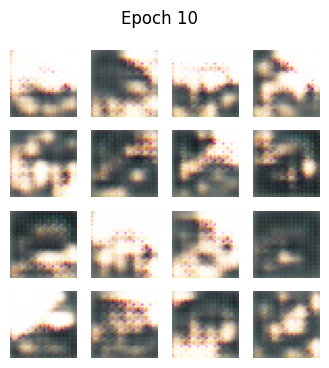

Epoch 11/50
Generator loss: 1.9121 | Discriminator loss: 0.9871
Epoch 12/50
Generator loss: 1.6566 | Discriminator loss: 1.0058
Epoch 13/50
Generator loss: 2.2126 | Discriminator loss: 0.7510
Epoch 14/50
Generator loss: 1.4966 | Discriminator loss: 1.0398
Epoch 15/50
Generator loss: 1.6353 | Discriminator loss: 1.0344
Epoch 16/50
Generator loss: 1.5163 | Discriminator loss: 1.0078
Epoch 17/50
Generator loss: 1.5554 | Discriminator loss: 1.0275
Epoch 18/50
Generator loss: 1.3457 | Discriminator loss: 1.1268
Epoch 19/50
Generator loss: 1.3623 | Discriminator loss: 1.1139
Epoch 20/50
Generator loss: 1.3304 | Discriminator loss: 1.0967


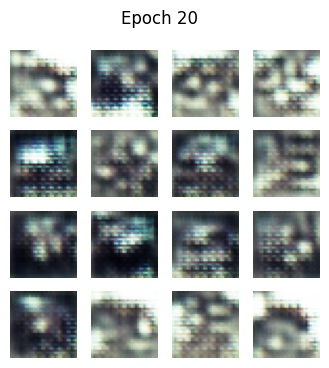

Epoch 21/50
Generator loss: 1.4841 | Discriminator loss: 1.1526
Epoch 22/50
Generator loss: 1.3205 | Discriminator loss: 1.1395
Epoch 23/50
Generator loss: 1.3067 | Discriminator loss: 1.0909
Epoch 24/50
Generator loss: 1.5906 | Discriminator loss: 1.0853
Epoch 25/50
Generator loss: 1.3467 | Discriminator loss: 1.0923
Epoch 26/50
Generator loss: 1.2076 | Discriminator loss: 1.1360
Epoch 27/50
Generator loss: 1.2975 | Discriminator loss: 1.1944
Epoch 28/50
Generator loss: 1.4694 | Discriminator loss: 1.0219
Epoch 29/50
Generator loss: 1.3616 | Discriminator loss: 1.1072
Epoch 30/50
Generator loss: 1.2451 | Discriminator loss: 1.1818


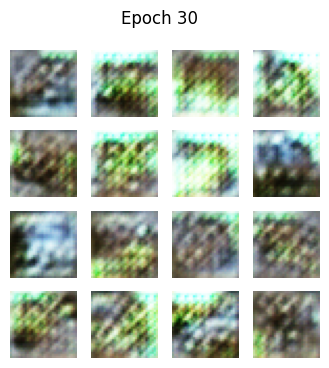

Epoch 31/50
Generator loss: 1.3353 | Discriminator loss: 1.1247
Epoch 32/50
Generator loss: 1.1343 | Discriminator loss: 1.2063
Epoch 33/50
Generator loss: 1.1068 | Discriminator loss: 1.1969
Epoch 34/50
Generator loss: 1.2669 | Discriminator loss: 1.2718
Epoch 35/50
Generator loss: 1.2247 | Discriminator loss: 1.1687
Epoch 36/50
Generator loss: 1.2029 | Discriminator loss: 1.2095
Epoch 37/50
Generator loss: 1.1214 | Discriminator loss: 1.2289
Epoch 38/50
Generator loss: 1.2921 | Discriminator loss: 1.2130
Epoch 39/50
Generator loss: 1.2449 | Discriminator loss: 1.2006
Epoch 40/50
Generator loss: 1.0847 | Discriminator loss: 1.2618


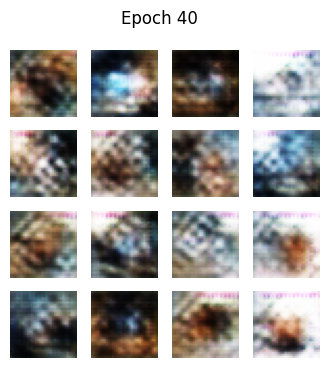

Epoch 41/50
Generator loss: 1.0902 | Discriminator loss: 1.2132
Epoch 42/50
Generator loss: 1.2659 | Discriminator loss: 1.1852
Epoch 43/50
Generator loss: 1.1069 | Discriminator loss: 1.2153
Epoch 44/50
Generator loss: 1.2164 | Discriminator loss: 1.2214
Epoch 45/50
Generator loss: 1.2081 | Discriminator loss: 1.1731
Epoch 46/50
Generator loss: 1.1381 | Discriminator loss: 1.1746
Epoch 47/50
Generator loss: 1.3965 | Discriminator loss: 1.1340
Epoch 48/50
Generator loss: 1.3374 | Discriminator loss: 1.1491
Epoch 49/50
Generator loss: 1.3065 | Discriminator loss: 1.1023
Epoch 50/50
Generator loss: 1.2367 | Discriminator loss: 1.2022


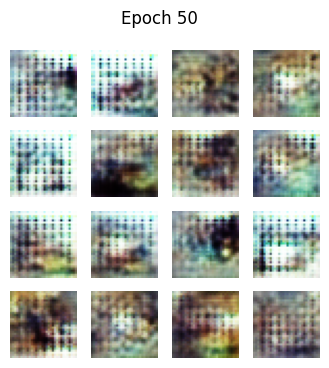

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-10 and normalize to [-1,1]
(x_train, _), (_, _) = tf.keras.datasets.cifar10.load_data()
x_train = (x_train.astype('float32') - 127.5) / 127.5

BUFFER_SIZE = x_train.shape[0]
BATCH_SIZE = 256
latent_dim = 100
EPOCHS = 50

train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

# Generator model
def make_generator_model():
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(latent_dim,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((8, 8, 256)),
        layers.Conv2DTranspose(128, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5,5), strides=(2,2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(3, (5,5), strides=(1,1), padding='same', use_bias=False, activation='tanh')
    ])
    return model

# Discriminator model
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5,5), strides=(2,2), padding='same', input_shape=[32,32,3]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5,5), strides=(2,2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model

generator = make_generator_model()
discriminator = make_discriminator_model()

cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Loss functions
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output)*0.9, real_output)  # label smoothing
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    return real_loss + fake_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

# Optimizers
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

# Training step (tf.function for speed)
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, latent_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss

# Training loop with progress info
def train(dataset, epochs):
    for epoch in range(1, epochs + 1):
        print(f"Epoch {epoch}/{epochs}")
        gen_loss_avg = tf.keras.metrics.Mean()
        disc_loss_avg = tf.keras.metrics.Mean()

        for image_batch in dataset:
            g_loss, d_loss = train_step(image_batch)
            gen_loss_avg(g_loss)
            disc_loss_avg(d_loss)

        print(f"Generator loss: {gen_loss_avg.result():.4f} | Discriminator loss: {disc_loss_avg.result():.4f}")

        if epoch % 10 == 0 or epoch == 1:
            generate_and_save_images(generator, epoch)

# Helper function to save generated images
def generate_and_save_images(model, epoch, test_input=None):
    if test_input is None:
        test_input = tf.random.normal([16, latent_dim])

    predictions = model(test_input, training=False)
    predictions = (predictions + 1) / 2.0  # Rescale to [0,1]

    fig = plt.figure(figsize=(4,4))
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i])
        plt.axis('off')

    plt.suptitle(f"Epoch {epoch}")
    plt.show()

# Start training
train(train_dataset, EPOCHS)

The training loop runs for the specified number of epochs.

- We alternate training the discriminator on real and fake images.
- Then train the generator to produce more realistic images that can fool the discriminator.
- We monitor progress by printing losses and accuracy, and save example generated images periodically.

This adversarial training process allows both models to improve over time, resulting in increasingly realistic generated images.

# 7. Adversarial Learning Explanation

Adversarial learning is a training technique where two neural networks, called the generator and the discriminator, compete against each other. The generator tries to create realistic data samples that resemble the training data, while the discriminator attempts to distinguish between real samples and those produced by the generator. Through this competitive process, the generator improves its ability to produce increasingly realistic data, effectively learning the underlying data distribution. This dynamic is the core of Generative Adversarial Networks (GANs), enabling them to generate high-quality synthetic data that can closely mimic real-world examples.

# 8. OpenAI API Usage

## 8.1 Text Generation

Since free OpenAI accounts often face quota limitations, we will use an **open-source alternative** that runs locally or in the cloud without API usage restrictions. One such alternative is **Hugging Face Transformers**, which provides access to models like `GPT2`, `DistilGPT2`, and more.

We will use the `transformers` library from Hugging Face to perform text generation directly, bypassing OpenAI API limits while maintaining similar functionality. This allows you to experiment freely without worrying about API quotas or rate limits.

In [13]:
# Install required packages if not already installed
!pip install transformers --quiet

from transformers import pipeline, set_seed

# Set up the text generation pipeline with GPT-2
generator = pipeline("text-generation", model="gpt2")
set_seed(42)

# Define your prompt
prompt = "A futuristic cityscape at night with neon lights and flying cars. Caption:"

# Generate a short caption
response = generator(prompt, max_length=30, num_return_sequences=1)

# Print the generated text
print(response[0]['generated_text'])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
Both `max_new_tokens` (=256) and `max_length`(=30) seem to have been set. `max_new_tokens` will take precedence. Please refer to the documentation for more information. (https://huggingface.co/docs/transformers/main/en/main_classes/text_generation)


A futuristic cityscape at night with neon lights and flying cars. Caption: The cityscape in the Star Wars movie. Star Wars: The Force Awakens stars Carrie Fisher, John Boyega, Daisy Ridley and Harrison Ford. The movie will be released on April 26, 2017. (Photo by Jack Kirby/Dreamstime via Getty Images) The skyline in Star Wars: The Force Awakens stars Carrie Fisher, John Boyega, Daisy Ridley and Harrison Ford. The movie will be released on April 26, 2017. (Photo by Jack Kirby/Dreamstime via Getty Images) Star Wars: The Force Awakens stars Carrie Fisher, John Boyega, Daisy Ridley and Harrison Ford. The movie will be released on April 26, 2017. (Photo by Jack Kirby/Dreamstime via Getty Images)

The Star Wars: The Force Awakens star Carrie Fisher was in a car with her husband, Luke Skywalker, and their daughter, Carrie Fisher, when they received a text message from an unseen droid. When the star entered the room, Luke and Leia noticed a droid coming at them. While in the car, Leia saw a l

This approach uses Hugging Face's `GPT-2` model, which is capable of generating coherent and contextually relevant text. Although it may not be as advanced as GPT-3.5 or GPT-4, it performs well for simple text generation tasks like generating captions or short descriptions, and it works entirely offline or without paid APIs.

## 8.2 Image Generation

Since OpenAI's image generation API (`image.generate`) is not accessible under a free-tier plan due to quota limits, we use an open-source alternative: **Stable Diffusion** via Hugging Face's `diffusers` library.

This approach allows generating images using local or free-tier Colab resources without needing an OpenAI API key.

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/4.72k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

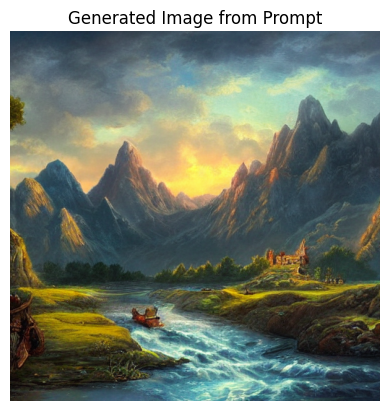

In [15]:
# Install required packages
!pip install diffusers transformers accelerate scipy safetensors --quiet

from diffusers import StableDiffusionPipeline
import torch
import matplotlib.pyplot as plt

# Load Stable Diffusion (default version, no specific revision needed)
pipe = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5")
pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

# Set a prompt and generate an image
prompt = "A fantasy landscape with mountains, a river, and a glowing sky"
image = pipe(prompt).images[0]

# Display the generated image
plt.imshow(image)
plt.axis("off")
plt.title("Generated Image from Prompt")
plt.show()

This code uses **Stable Diffusion v1.5**, a powerful open-source image generation model that interprets text prompts and creates matching images. Using it instead of OpenAI's API ensures accessibility and freedom from usage limits. For environments without a GPU, Hugging Face also provides hosted inference APIs or you can run lower-weight models locally.

## 8.3 Voice Generation

In this section, we use a text-to-speech (TTS) system to convert generated text into spoken audio. Since OpenAI’s TTS tools require API access with usage limits, we instead use **TTS from the `tts` library by coqui.ai**, an open-source alternative that works well on local machines and free-tier Colab environments.

We use a sample sentence and synthesize it into audio.

In [17]:
# Import and load TTS model
from TTS.api import TTS

# Load a multilingual or English TTS model
tts = TTS(model_name="tts_models/en/ljspeech/tacotron2-DDC", progress_bar=False, gpu=False)

# Text to be converted to speech
text = "This image shows a fantasy landscape with mountains, a river, and a glowing sky."

# Generate and save the speech audio
tts.tts_to_file(text=text, file_path="output.wav")

 > tts_models/en/ljspeech/tacotron2-DDC is already downloaded.
 > vocoder_models/en/ljspeech/hifigan_v2 is already downloaded.
 > Using model: Tacotron2
 > Setting up Audio Processor...
 | > sample_rate:22050
 | > resample:False
 | > num_mels:80
 | > log_func:np.log
 | > min_level_db:-100
 | > frame_shift_ms:None
 | > frame_length_ms:None
 | > ref_level_db:20
 | > fft_size:1024
 | > power:1.5
 | > preemphasis:0.0
 | > griffin_lim_iters:60
 | > signal_norm:False
 | > symmetric_norm:True
 | > mel_fmin:0
 | > mel_fmax:8000.0
 | > pitch_fmin:1.0
 | > pitch_fmax:640.0
 | > spec_gain:1.0
 | > stft_pad_mode:reflect
 | > max_norm:4.0
 | > clip_norm:True
 | > do_trim_silence:True
 | > trim_db:60
 | > do_sound_norm:False
 | > do_amp_to_db_linear:True
 | > do_amp_to_db_mel:True
 | > do_rms_norm:False
 | > db_level:None
 | > stats_path:None
 | > base:2.718281828459045
 | > hop_length:256
 | > win_length:1024
 > Model's reduction rate `r` is set to: 1
 > Vocoder Model: hifigan
 > Setting up Audio P

'output.wav'

Now we can listen to the audio output directly:

In [18]:
# Play the audio (works in Jupyter/Colab)
from IPython.display import Audio
Audio("output.wav")

### Description

The sentence we used was based on the image description generated earlier. The `TTS` library uses a deep learning model (Tacotron2) to convert text into speech, and a vocoder (like WaveGlow or HiFi-GAN internally) to synthesize realistic audio from the model's output.

This demonstrates how different generative AI tools—text generation, image generation, and voice synthesis—can be used in a pipeline to create multimodal content. We start from a prompt, generate a description, then visualize it with an image, and finally produce an audio narration.

# 9. Bonus: Variational Autoencoder (VAE) on Fashion MNIST

## 9.1 VAE Architecture

In this section, we define the architecture of a Variational Autoencoder (VAE). The VAE consists of an encoder that maps input images to a latent space represented by a mean and a log variance vector. We then use the reparameterization trick to sample from this latent space during training. The decoder reconstructs the input images from the sampled latent vectors.

In [19]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class VAE(nn.Module):
    def __init__(self, latent_dim=20):
        super(VAE, self).__init__()

        # Encoder layers
        self.fc1 = nn.Linear(28*28, 400)
        self.fc_mu = nn.Linear(400, latent_dim)         # Mean vector of latent space
        self.fc_logvar = nn.Linear(400, latent_dim)     # Log variance vector of latent space

        # Decoder layers
        self.fc3 = nn.Linear(latent_dim, 400)
        self.fc4 = nn.Linear(400, 28*28)

    def encode(self, x):
        h1 = F.relu(self.fc1(x))
        mu = self.fc_mu(h1)
        logvar = self.fc_logvar(h1)
        return mu, logvar

    def reparameterize(self, mu, logvar):
        std = torch.exp(0.5 * logvar)
        eps = torch.randn_like(std)
        return mu + eps * std

    def decode(self, z):
        h3 = F.relu(self.fc3(z))
        return torch.sigmoid(self.fc4(h3))

    def forward(self, x):
        mu, logvar = self.encode(x.view(-1, 28*28))
        z = self.reparameterize(mu, logvar)
        recon_x = self.decode(z)
        return recon_x, mu, logvar

This architecture enables the model to learn a meaningful latent space representation of the Fashion MNIST dataset, with the ability to generate new samples by decoding points sampled from this latent space.

## 9.2 Training the VAE

In this section, we will train the VAE model defined previously on the Fashion MNIST dataset. The loss function used is a combination of reconstruction loss (binary cross-entropy) and the Kullback-Leibler (KL) divergence, which regularizes the latent space to follow a normal distribution.

We will use the Adam optimizer and run the training for multiple epochs while monitoring the loss.


In [20]:
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Load Fashion MNIST dataset
transform = transforms.ToTensor()
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = VAE(latent_dim=20).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)

def loss_function(recon_x, x, mu, logvar):
    BCE = F.binary_cross_entropy(recon_x, x.view(-1, 28*28), reduction='sum')
    KLD = -0.5 * torch.sum(1 + logvar - mu.pow(2) - logvar.exp())
    return BCE + KLD

num_epochs = 20

model.train()
for epoch in range(1, num_epochs + 1):
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()
        recon_batch, mu, logvar = model(data)
        loss = loss_function(recon_batch, data, mu, logvar)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()

    avg_loss = train_loss / len(train_loader.dataset)
    print(f"Epoch {epoch}/{num_epochs}, Average Loss: {avg_loss:.4f}")

100%|██████████| 26.4M/26.4M [00:01<00:00, 14.0MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 207kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 3.87MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 9.49MB/s]


Epoch 1/20, Average Loss: 284.5728
Epoch 2/20, Average Loss: 256.0352
Epoch 3/20, Average Loss: 250.0698
Epoch 4/20, Average Loss: 247.3119
Epoch 5/20, Average Loss: 245.7067
Epoch 6/20, Average Loss: 244.6807
Epoch 7/20, Average Loss: 243.9442
Epoch 8/20, Average Loss: 243.3077
Epoch 9/20, Average Loss: 242.8387
Epoch 10/20, Average Loss: 242.4676
Epoch 11/20, Average Loss: 242.0853
Epoch 12/20, Average Loss: 241.8295
Epoch 13/20, Average Loss: 241.5183
Epoch 14/20, Average Loss: 241.2824
Epoch 15/20, Average Loss: 241.0929
Epoch 16/20, Average Loss: 240.9210
Epoch 17/20, Average Loss: 240.7679
Epoch 18/20, Average Loss: 240.5828
Epoch 19/20, Average Loss: 240.4427
Epoch 20/20, Average Loss: 240.3374


The training process minimizes both the reconstruction error and the KL divergence, encouraging the model to learn a smooth and continuous latent space while accurately reconstructing input images.

## 9.3 Generating New Samples

After training the VAE, we can generate new samples by sampling points from the latent space and passing them through the decoder. This allows the model to create new, meaningful data that resembles the training distribution.

Below, we sample random latent vectors from a standard normal distribution and decode them to produce new Fashion MNIST-like images.


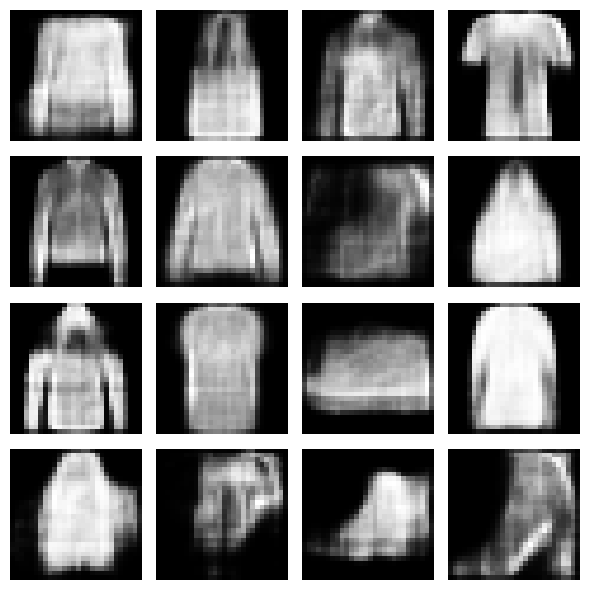

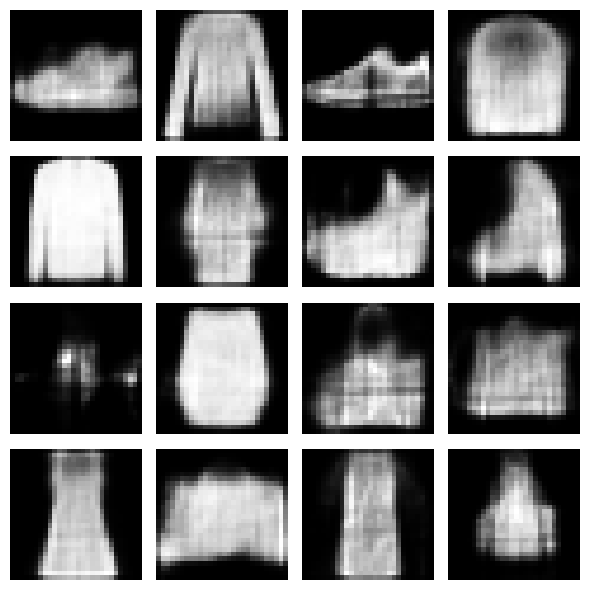

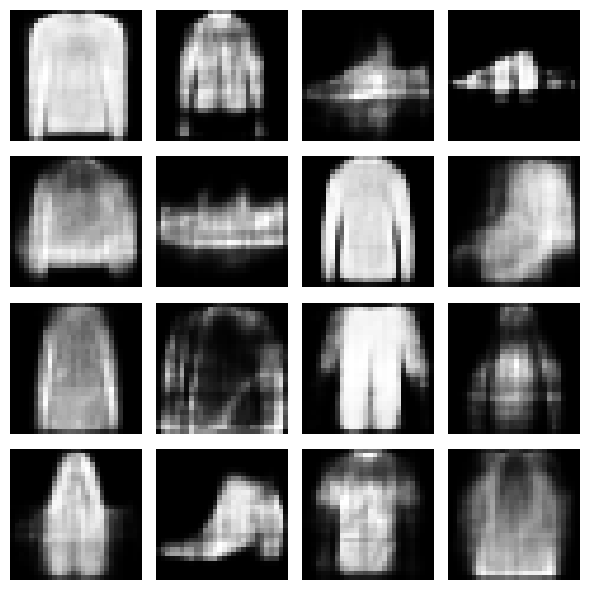

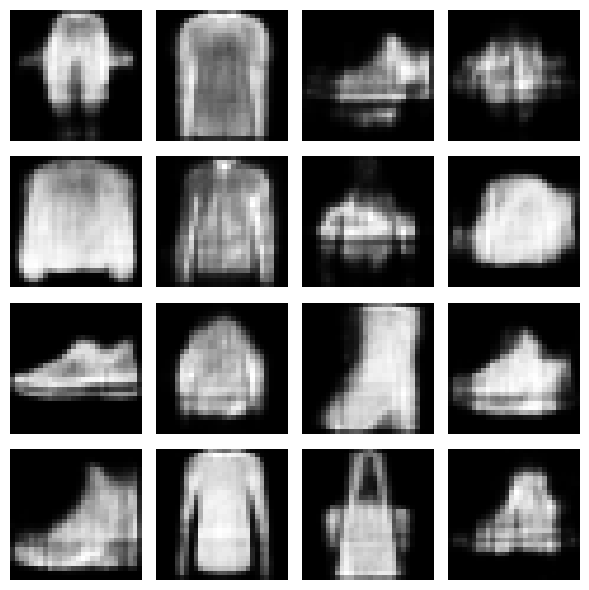

In [26]:
import matplotlib.pyplot as plt

model.eval()

with torch.no_grad():
    # Sample latent vectors from standard normal distribution
    z = torch.randn(16, 20).to(device)
    generated = model.decode(z)
    generated = generated.view(-1, 1, 28, 28).cpu()
    generated = torch.sigmoid(generated)  # ensure values are in [0, 1]

    # Plot generated images
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(generated[i][0], cmap='gray')
        ax.axis('off')
    plt.tight_layout()
    plt.show()


Variational Autoencoders have several benefits over traditional autoencoders:

- VAEs learn a continuous and structured latent space that allows meaningful interpolation and sampling.
- They incorporate a probabilistic framework with a regularized latent distribution, enabling generative modeling.
- Unlike traditional autoencoders that only reconstruct input data, VAEs can generate new data samples by sampling from the latent space.

This makes VAEs powerful tools for unsupervised learning, data generation, and representation learning.

## 10. Final Thoughts and Summary

Throughout this notebook, I explored several fundamental and advanced techniques in generative modeling and deep learning. I implemented a basic autoencoder and progressively moved toward more complex models like Variational Autoencoders (VAEs) and Generative Adversarial Networks (GANs). I also experimented with pre-trained diffusion models and used various AI APIs to generate text, images, and speech.

One of the key challenges I encountered was working with large models, such as those from Hugging Face or OpenAI, due to quota limitations or connection issues. To address this, I resorted to using open-source alternatives or local solutions wherever possible.

Another challenge was ensuring that the outputs from models like the VAE were correctly shaped and normalized for visualization. Fine-tuning the model structure and output activation functions was necessary for meaningful results.

For future improvements, I would consider:
- Using better hardware acceleration to reduce training time
- Incorporating conditional generation to control outputs more precisely
- Exploring evaluation metrics to quantitatively compare model performance
- Using techniques like transfer learning to improve data efficiency

Overall, this project helped reinforce my understanding of deep learning architecture design, optimization, and the growing ecosystem of AI tools and APIs.